# COVID-19 Forcasting
> BIOSTAT823 Final Project: Shannon Murphy, Jennie Sun, Malcolm Smith Fraser

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- image: images/some_folder/your_image.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2
- use_plotly: true
- use_matplotlib: true
- use_seaborn: true

### Project description
https://github.com/jenniesun/covid_forcasting/blob/main/README.md

Google Colab Link: https://colab.research.google.com/drive/1mHLTMl_ijPuWJRn0V-QplcNKso-CS1XO?usp=sharing

### Data Processing

In [5]:
#hide
import pandas as pd

In [6]:
#hide
cases_deaths = pd.read_csv('AWS_casesDHPC.csv')
cases_deaths.head()

,Date,Confirmed (daily growth) (CUSTOM),Deaths (daily growth) (CUSTOM),Confirmed (window average) (CUSTOM),Deaths (window average) (CUSTOM)
0,2021-11-02 00:00:00,39.0,0.0,188.4000,1.6000
1,2021-11-01 00:00:00,704.0,2.0,223.3333,2.5000
2,2021-10-31 00:00:00,0.0,0.0,252.8571,2.2857
3,2021-10-30 00:00:00,34.0,0.0,231.0000,2.0000
4,2021-10-29 00:00:00,165.0,6.0,305.0000,2.5000


In [7]:
#hide
cases_deaths = cases_deaths.drop(columns= [ "Confirmed (window average) (CUSTOM)", "Deaths (window average) (CUSTOM)"])

In [8]:
#hide
cases_deaths['Date'] = pd.to_datetime(cases_deaths['Date']).dt.date
cases_deaths['Date'] = cases_deaths['Date'].astype('str')

In [9]:
#hide
cases_deaths.head()

,Date,Confirmed (daily growth) (CUSTOM),Deaths (daily growth) (CUSTOM)
0,2021-11-02,39.0,0.0
1,2021-11-01,704.0,2.0
2,2021-10-31,0.0,0.0
3,2021-10-30,34.0,0.0
4,2021-10-29,165.0,6.0


In [10]:
#hide
beds_vents = pd.read_excel('DHHS_HOSPITAL_BEDS_VENTILATORS_REGION.xls')

In [11]:
#hide
beds_ventsDHPC = beds_vents[beds_vents["Coalition"] == "DHPC"]

In [12]:
#hide
hosp = pd.read_excel('DHHS_HOSPITAL_METRICS_REGION.xls')

In [13]:
#hide
hospDHPC = hosp[hosp["Coalition"] == "DHPC"]

In [14]:
#hide
hospall = pd.merge(hospDHPC, beds_ventsDHPC.drop(columns = ["Coalition"]), how = 'outer', on = 'Date')
hospall.sample(10)

,Index_x,Date,Coalition,Hospitalizations,Adult ICU COVID-19 Patients,Confirmed Patient Admitted - Last 24 Hours,Hospitalized and Ventilated COVID Inpatient Count,Index_y,Ventilators In Use,Ventilators Available,ICU Beds In Use,ICU Empty Staffed Beds,Inpatient Beds In Use,Inpatient Empty Staffed Beds
121,970,2021-07-04,DHPC,37,9.0,4.0,9.0,970,74,168,133,30,1293,417
57,458,2021-09-06,DHPC,234,55.0,23.0,45.0,458,118,124,164,12,1418,247
337,2698,2020-11-30,DHPC,148,36.0,16.0,21.0,2698,77,165,176,14,1418,368
87,698,2021-08-07,DHPC,112,29.0,15.0,20.0,698,93,149,141,20,1361,244
553,4426,2020-04-28,DHPC,67,NaN,NaN,NaN,4426,108,327,160,60,1548,682
10,82,2021-10-23,DHPC,105,39.0,6.0,21.0,82,94,148,158,15,1357,291
225,1802,2021-03-22,DHPC,141,37.0,14.0,28.0,1802,102,140,168,19,1467,305
51,410,2021-09-12,DHPC,225,60.0,29.0,49.0,410,129,113,163,17,1431,203
72,578,2021-08-22,DHPC,187,48.0,26.0,31.0,578,119,123,166,16,1387,220
149,1194,2021-06-06,DHPC,61,17.0,4.0,12.0,1194,92,150,147,20,1265,419


In [15]:
#hide
hospall['Date'] = hospall['Date'].astype('str')

In [16]:
#hide
df = pd.merge(hospall, cases_deaths, how = 'outer', on = 'Date')
df.sample(10)

,Index_x,Date,Coalition,Hospitalizations,Adult ICU COVID-19 Patients,Confirmed Patient Admitted - Last 24 Hours,Hospitalized and Ventilated COVID Inpatient Count,Index_y,Ventilators In Use,Ventilators Available,ICU Beds In Use,ICU Empty Staffed Beds,Inpatient Beds In Use,Inpatient Empty Staffed Beds,Confirmed (daily growth) (CUSTOM),Deaths (daily growth) (CUSTOM)
169,1354.0,2021-05-17,DHPC,71.0,17.0,9.0,14.0,1354.0,98.0,144.0,168.0,20.0,1399.0,386.0,152.0,2.0
318,2546.0,2020-12-19,DHPC,158.0,34.0,30.0,23.0,2546.0,80.0,160.0,164.0,27.0,1298.0,466.0,176.0,3.0
400,3202.0,2020-09-28,DHPC,79.0,23.0,28.0,16.0,3202.0,86.0,152.0,123.0,12.0,1442.0,287.0,275.0,1.0
484,3874.0,2020-07-06,DHPC,107.0,32.0,11.0,NaN,3874.0,94.0,145.0,156.0,24.0,1379.0,405.0,459.0,5.0
111,890.0,2021-07-14,DHPC,46.0,17.0,5.0,12.0,890.0,79.0,163.0,146.0,17.0,1487.0,233.0,107.0,2.0
598,NaN,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
558,4466.0,2020-04-23,DHPC,65.0,NaN,NaN,NaN,4466.0,108.0,264.0,145.0,56.0,1269.0,658.0,63.0,3.0
530,4242.0,2020-05-21,DHPC,78.0,NaN,NaN,NaN,4242.0,107.0,293.0,180.0,8.0,1589.0,293.0,100.0,4.0
143,1146.0,2021-06-12,DHPC,54.0,15.0,7.0,13.0,1146.0,93.0,149.0,151.0,27.0,1359.0,336.0,37.0,0.0
314,2514.0,2020-12-23,DHPC,181.0,42.0,22.0,27.0,2514.0,90.0,148.0,171.0,22.0,1304.0,459.0,1347.0,1.0


### EDA

In [20]:
#hide
df_new = df[:518].copy()

In [21]:
#hide
df_new.isna().any()

Index_x                                              False
Date                                                 False
Coalition                                            False
Hospitalizations                                     False
Adult ICU COVID-19 Patients                          False
Confirmed Patient Admitted - Last 24 Hours           False
Hospitalized and Ventilated COVID Inpatient Count     True
Index_y                                              False
Ventilators In Use                                   False
Ventilators Available                                False
ICU Beds In Use                                      False
ICU Empty Staffed Beds                               False
Inpatient Beds In Use                                False
Inpatient Empty Staffed Beds                         False
Confirmed (daily growth) (CUSTOM)                    False
Deaths (daily growth) (CUSTOM)                       False
dtype: bool

In [22]:
#hide
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 0 to 517
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Index_x                                            518 non-null    float64
 1   Date                                               518 non-null    object 
 2   Coalition                                          518 non-null    object 
 3   Hospitalizations                                   518 non-null    float64
 4   Adult ICU COVID-19 Patients                        518 non-null    float64
 5   Confirmed Patient Admitted - Last 24 Hours         518 non-null    float64
 6   Hospitalized and Ventilated COVID Inpatient Count  434 non-null    float64
 7   Index_y                                            518 non-null    float64
 8   Ventilators In Use                                 518 non-null    float64
 9   Ventilator

In [23]:
#hide
df_new.loc[:,'Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)

In [24]:
#hide
df_new['Year-Week'] = df_new['Date'].dt.strftime('%Y-%U')
df_new = df_new.sort_values('Date',ascending=False).fillna(0).drop(['Index_x','Index_y'],axis=1)

In [25]:
#hide
df_week = df_new.groupby('Year-Week').mean()

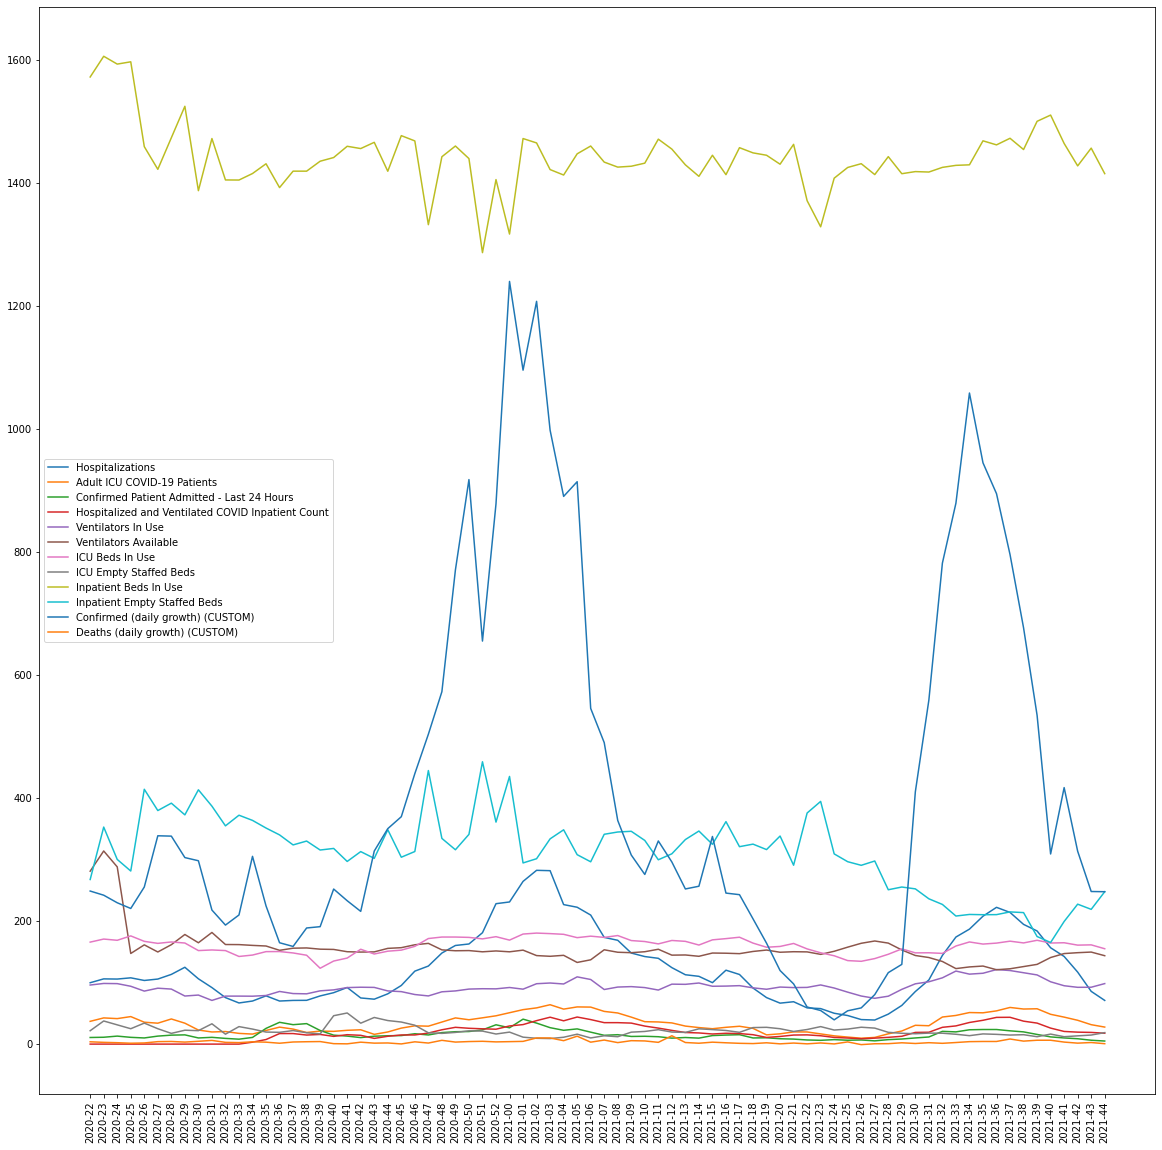

In [26]:
#collapse
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
p = plt.plot(df_week)
plt.legend(df_week.columns)
t = plt.xticks(rotation=90)

#### Correlation Heatmap

In [27]:
#hide
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

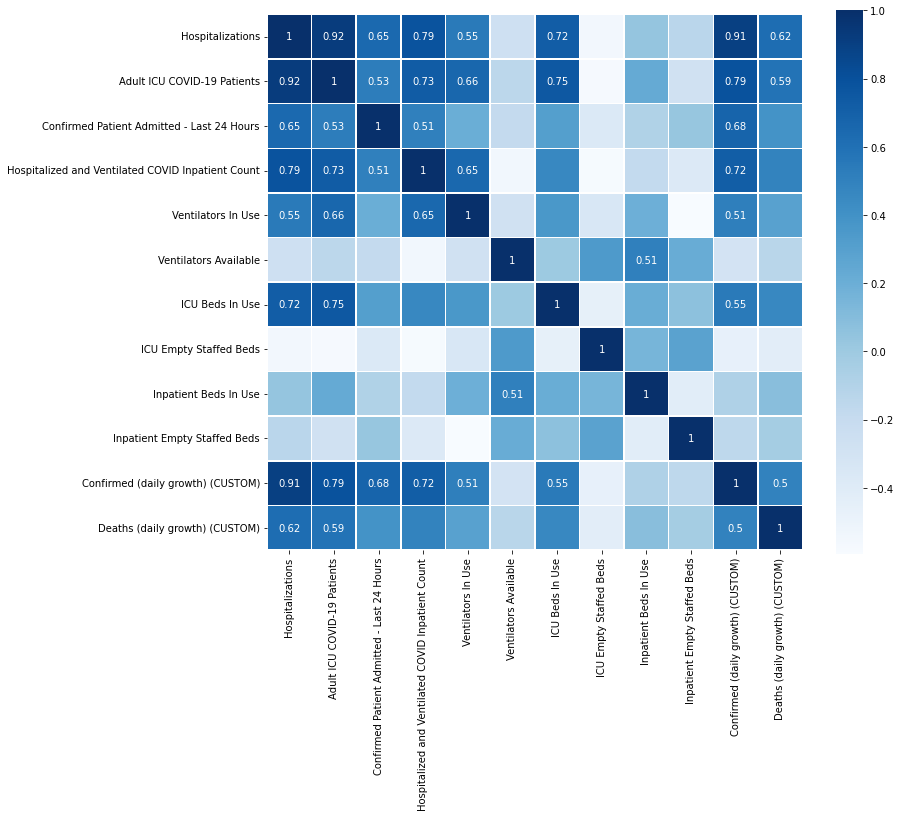

In [28]:
#collapse
f, ax = plt.subplots(figsize=(12, 10))

# calculate the correlation matrix
corr = df_week.corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True,
            square=True,
                linewidth=.5, ax=ax,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

for t in ax.texts:
    if float(t.get_text())>=0.5:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

### Univariate Analysis on the Growth of COVID-19 Death Count 

"Using the best order returned by the `auto_arima` package for model training, we were able to achieve a RMSE of 2.18 as a result." 

#### ARIMA Model - figuring out the best order

#### Train the Model

### Check How Good The Model Is: Forecasting

#### Check Accuracy Metric